# 데이터 살펴보기

## About this dataset

- age : Age of the patient
- sex : Sex of the patient
- cp : Chest Pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalachh : maximum heart rate achieved
- exng: exercise induced angina (1 = yes; 0 = no)
- caa: number of major vessels (0-3)
- target : 0 = less chance of heart attack, 1 = more chance of heart attack

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_data.describe( )

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 데이터 전터리

## 시각화

### 히스토그램으로 연속형/범주형 변수인지 확인

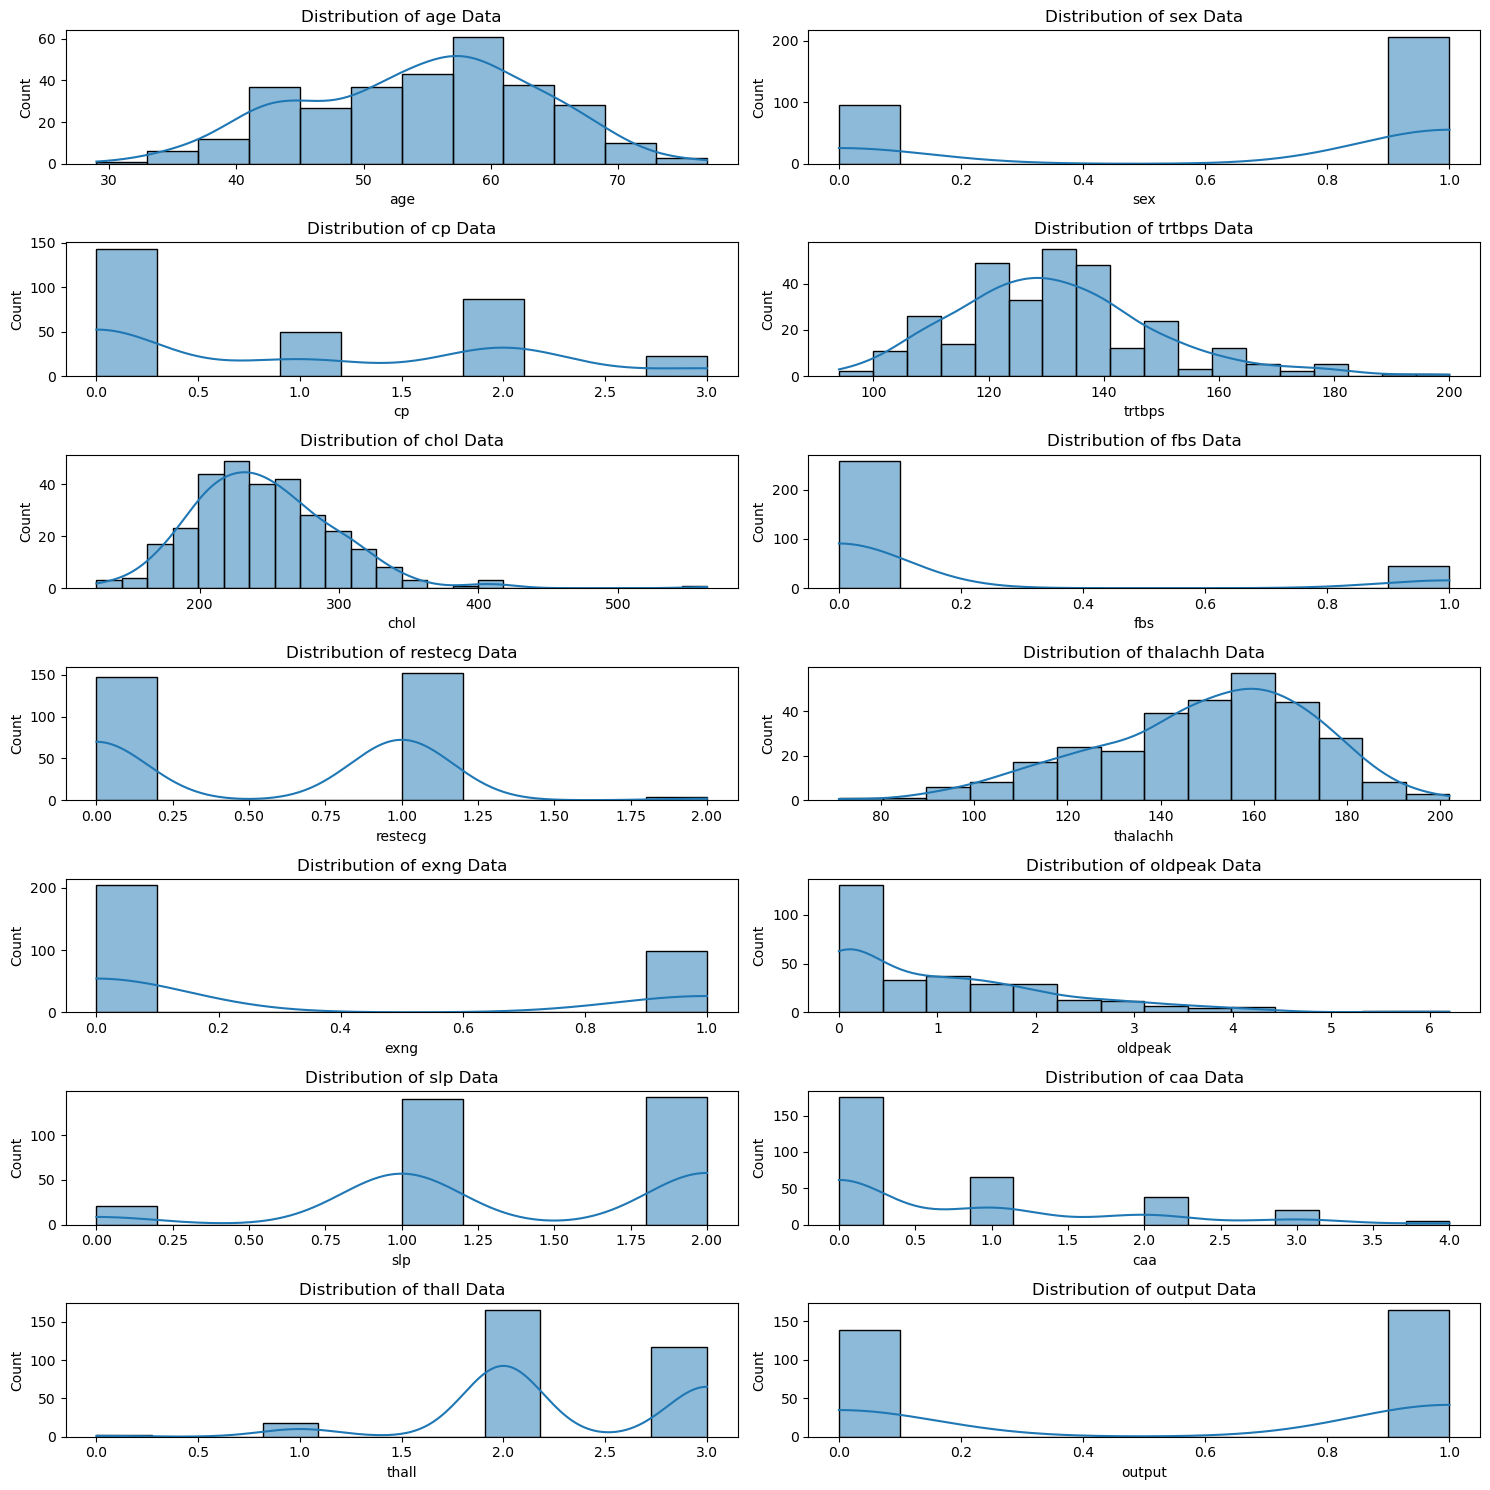

In [6]:
plt.figure(figsize=(15,15))
for i,col in enumerate(heart_data.columns,1):
    plt.subplot(7,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart_data[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [7]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

### 범주형 변수 barplot으로 시각화

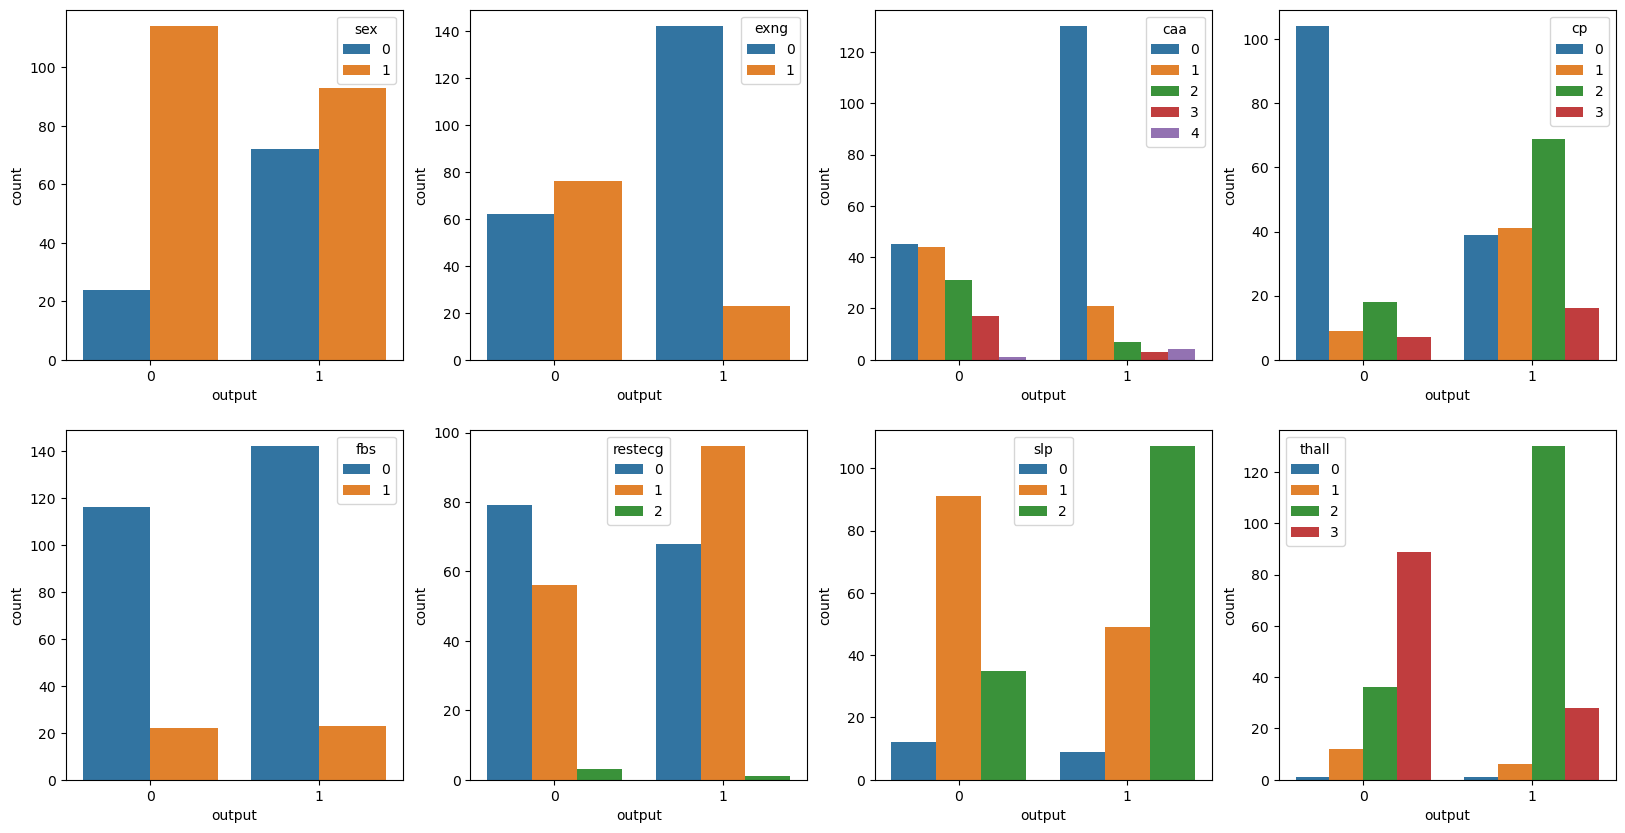

In [8]:
# 플롯의 행과 열을 설정
n_rows = 2
n_cols = 4

# matplotlib의 subplots를 사용하여 여러 그래프를 그립니다.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

# 각 변수에 대한 Barplot을 그립니다.
for i, var in enumerate(cat_cols):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(x='output', hue=var, data=heart_data, ax=axes[row, col])

### 연속형 변수 boxplot으로 시각화

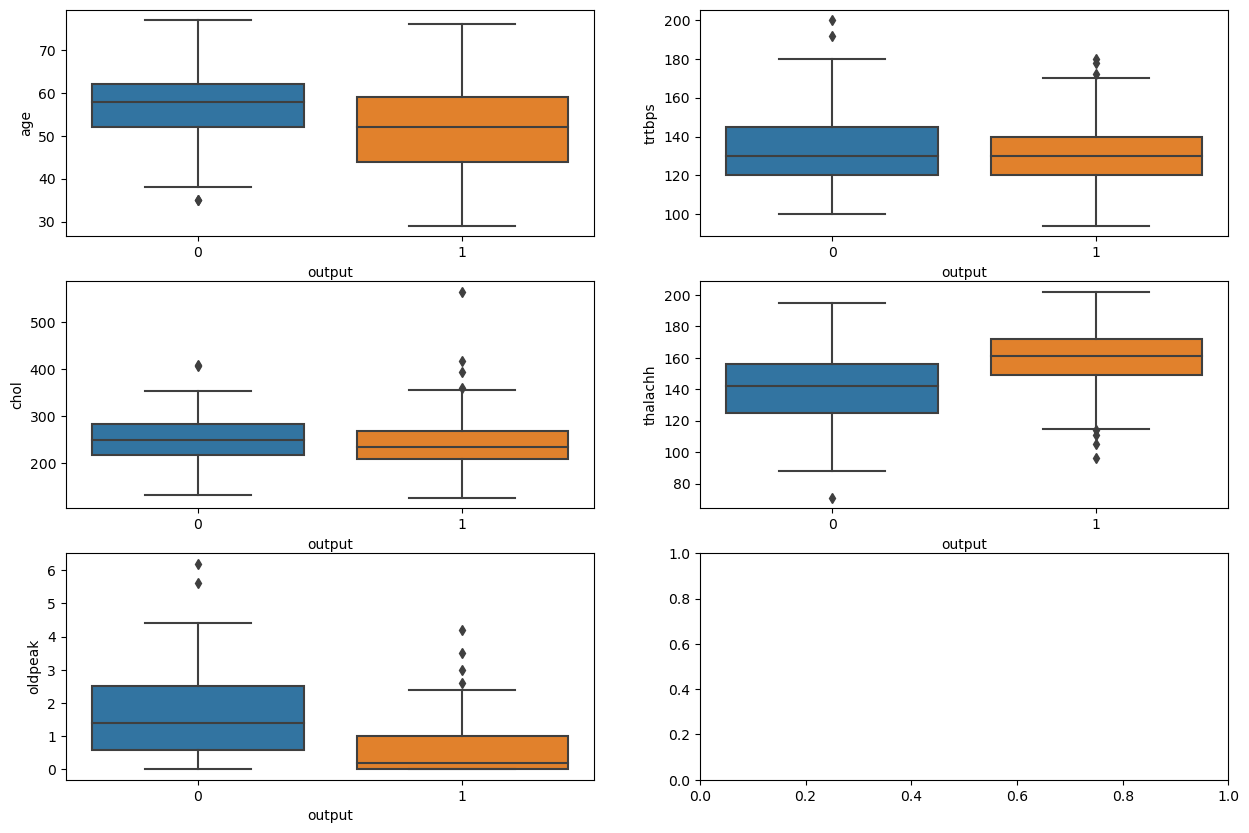

In [9]:
# 플롯의 행과 열을 설정
n_rows = 3
n_cols = 2

# matplotlib의 subplots를 사용하여 여러 그래프를 그립니다.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# 각 변수에 대한 Boxplot을 그립니다.
for i, var in enumerate(con_cols):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x='output', y=var, data=heart_data, ax=axes[row, col])

- chol은 심장마비 환자군의 수치가 오히려 낮았음
- thakachh은 최솟값, 중앙값, 최댓값 등이 모두 심장마비 환자군에서 높게 나타남

## 이상치 제거

### 상관도 확인

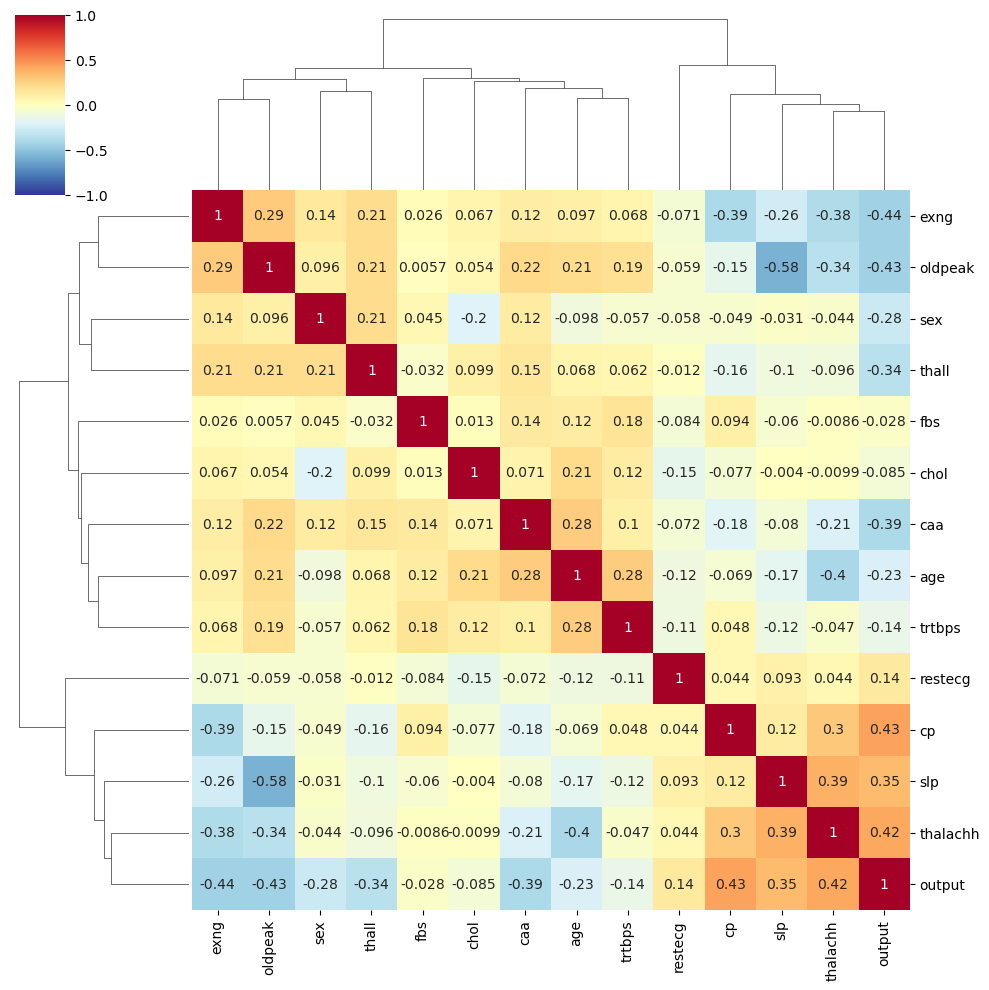

In [10]:
corr = heart_data.corr()

# 상관관계 시각화
# -1 또는 1에 가까울수록 상관관계 높은 것
sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, # 컬러차트 -1 ~ 1 범위로 표시
              )

### 이상치 제거: IQR 이용

In [11]:
# 1사분위수(Q1) 및 3사분위수(Q3) 계산
Q1 = heart_data.quantile(0.25)
Q3 = heart_data.quantile(0.75)

# IQR 계산
IQR = Q3 - Q1

# 임계값 설정 (일반적으로 1.5 이상을 사용)
threshold = 1.5

# 이상치 제거
clean_data = heart_data[~((heart_data < (Q1 - threshold * IQR)) | (heart_data > (Q3 + threshold * IQR))).any(axis=1)]

## 인코딩 및 피처 스케일링

In [12]:
# creating a copy of clean_data
df = clean_data

In [13]:
# encoding the categorical columns
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

# defining the features and target
X = df.drop(['output'],axis=1)
y = df[['output']]

In [14]:
from sklearn.preprocessing import RobustScaler

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,cp_1,cp_2,cp_3,restecg_1,restecg_2,slp_1,slp_2,thall_2,thall_3
1,-1.133333,0.0,0.184874,1.040650,1.8125,1,0,0,0,0,1,0,1,0,0,0,1,0
2,-0.866667,0.0,-0.588235,0.552846,0.5000,0,0,0,0,1,0,0,0,0,0,1,1,0
3,0.133333,-0.5,-0.050420,0.747967,0.1250,1,0,0,0,1,0,0,1,0,0,1,1,0
4,0.200000,-0.5,1.932773,0.260163,0.0000,0,1,0,0,0,0,0,1,0,0,1,1,0
5,0.200000,0.5,-0.789916,-0.227642,-0.1250,1,0,0,0,0,0,0,1,0,1,0,0,0


# 모델링

정답 레이블인 ‘심장마비 발병 여부’ 데이터를 알고 있음 → 지도 학습
심장마비 데이터의 경우, 정답 값이 0과 1로 이뤄진 이진분류 문제 → 분류 모델 사용

## 1. 의사결정트리

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# 학습용과 테스트용으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정트리 모델 초기화
model = DecisionTreeClassifier(random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.6956521739130435
F1 Score: 0.75


## 2. 랜덤 포레스트

In [16]:
from sklearn.ensemble import RandomForestClassifier

# 학습용과 테스트용으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.717391304347826
F1 Score: 0.7719298245614036


C:\Users\pangs\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## 3. XGBoost

In [17]:
import xgboost as xgb

# 학습용과 테스트용으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 초기화 및 학습
model = xgb.XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8043478260869565
F1 Score: 0.8421052631578947


## 4. 로지스틱 회귀

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 인코딩된 데이터프레임을 사용하여 X, y 정의
X = df.drop(['output'], axis=1)
y = df[['output']]

# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 초기화 및 연속형 변수 스케일링
scaler = RobustScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])

# 로지스틱 회귀 모델 초기화 및 학습
log_reg = LogisticRegression(max_iter=1000)  # 반복 횟수 설정
log_reg.fit(X_train, y_train.values.ravel())  # 모델 학습

# 테스트 세트로 예측
y_pred = log_reg.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.782608695652174
F1 Score: 0.8275862068965517


### 하이퍼파라미터 튜닝

In [26]:
from sklearn.model_selection import GridSearchCV

# 로지스틱 회귀 모델 초기화
log_reg = LogisticRegression(max_iter=1000)

# 튜닝할 하이퍼파라미터 설정
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 규제 강도
    'penalty': ['l1', 'l2'],  # 규제 유형
    'solver': ['liblinear']  # 'l1' 규제에 적합한 솔버
}

# GridSearchCV 초기화
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train, y_train.values.ravel())

# 최적의 파라미터와 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 최적의 모델을 사용하여 테스트 데이터에 대한 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8298798798798799
Accuracy: 0.782608695652174
F1 Score: 0.8275862068965517
